For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: __Andrew Lin, Praneeth Prathi, Zibing Zhang__

Step 1: Train your own word embeddings
--------------------------------

<!-- (describe the provided dataset that you have chosen here) -->
The first dataset that we are using was provided by the instructors.
It is the complete works of Shakespeare.
It seems to have already gone through a large amount of normalization, as there are not punctuation marks, and everything is lowercased.
This poses some issue since we do not know sentence boundaries, but we will treat separate lines as separate sentences.
As Shakespeare's works are mostly plays, there are a lot of stage instructions included in the corpus, as well as lots of proper nouns that only appear for the duration of a specific play.

<!-- Describe what data set you have chosen to compare and contrast with the your chosen provided dataset. Make sure to describe where it comes from and it's general properties. -->

<!-- (describe your dataset here) -->
The second dataset that we are using is from the nltk gutenberg corpus.
We have chosen the full text of the King James version of the Bible.
The data is already split by whitespace and punctuation.
There are a lot of words that indicate the current verse, among other markings.
Most of these things are filtered out in text pre-processing as described below.

In [1]:
# import your libraries here

import nltk
import re

In [2]:
# setup datasets and pre-process into desired format

# Read the file and prepare the training data 
# so that it is in the following format

# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]

START_TOKEN = "<s>"
END_TOKEN = "</s>"

# shakespeare, given dataset
dataset_1 = []
with open("shakespeare_plays.txt") as f:
  dataset_1 = [[START_TOKEN] + line.split() + [END_TOKEN] for line in f.read().strip().split("\n")]
# print(dataset_1[0])  # first sentence

# king james version of bible, our datset
dataset_2 = []
nltk.download("gutenberg")
kjv = nltk.corpus.gutenberg.words("bible-kjv.txt")
# print(len(kjv))  # 1010654 words
sentence = [START_TOKEN]
for word in kjv:
  # lower case words
  word = word.lower()
  # period denotes end of sentence
  if word == ".":
    sentence.append(END_TOKEN)
    dataset_2.append(sentence)
    sentence = [START_TOKEN]
  # only allow words that contain only letters
  elif not re.match(r"^[a-z]+$", word):
    continue
  else:
    sentence.append(word)
print(dataset_2[0])  # first sentence

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Zibing\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['<s>', 'the', 'king', 'james', 'bible', 'the', 'old', 'testament', 'of', 'the', 'king', 'james', 'bible', 'the', 'first', 'book', 'of', 'moses', 'called', 'genesis', 'in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth', '</s>']


In [3]:
# code to train word embeddings

from gensim.models import Word2Vec

# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim.
# The default arguments are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
def train_embeddings(dataset, embeddings_size=EMBEDDINGS_SIZE, sg=1, window=5, min_count=1):
  return Word2Vec(sentences=dataset, vector_size=embeddings_size, sg=sg, window=window, min_count=min_count)


### a) Train embeddings on GIVEN dataset

In [4]:
model_1 = train_embeddings(dataset_1)

In [ ]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
# print('Vocab size {}'.format(len(model.wv.vocab)))  # outdatted in gensim 4.0.0
print('Vocab size {}'.format(len(model_1.wv.index_to_key)))

In [ ]:
# You can save file in txt format, then load later if you wish.
# model_1.wv.save_word2vec_format('embeddings.txt', binary=False)

### b) Train embedding on YOUR dataset

In [5]:
model_2 = train_embeddings(dataset_2)

In [ ]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
# print('Vocab size {}'.format(len(model.wv.vocab)))  # outdatted in gensim 4.0.0
print('Vocab size {}'.format(len(model_2.wv.index_to_key)))

In [ ]:
# You can save file in txt format, then load later if you wish.
# model_2.wv.save_word2vec_format('embeddings.txt', binary=False)

__What text-normalization and pre-processing did you do and why?__

For the given dataset, there was not any pre-processing that was done, because the dataset was already in a format that was very much well suited to modeling.
Everything was lower cased, and there was no punctuation.
This did pose some problem, as there was no clear delimiter for when a sentence would begin and end, but we decided to split the corpus into sentences on newlines.

The King James Version of the Bible required some text-normalization and pre-processing.
The corpus was already split into tokens, but we filtered some out and added some text-normalization.
To be overly cautious, we discarded all tokens that contained more than just alphabetic characters.
We also lower cased all the words.

Step 2: Evaluate the differences between the word embeddings
----------------------------

(make sure to include graphs, figures, and paragraphs with full sentences)

Analogies for model Shakespears Works...
	Analogy 0: `man' is to `king' as `woman' is to `elizabeth'
	Analogy 1: `moon' is to `stars' as `sun' is to `joys'
	Analogy 2: `father' is to `son' as `mother' is to `child'
	Analogy 3: `disease' is to `plague' as `death' is to `cruel'
	Analogy 4: `hot' is to `warm' as `cold' is to `teeth'
	Analogy 5: `sin' is to `apple' as `virtue' is to `infant'
	Analogy 6: `food' is to `hungry' as `water' is to `salt'
Analogies for model King James Bible...
	Analogy 0: `man' is to `king' as `woman' is to `queen'
	Analogy 1: `moon' is to `stars' as `sun' is to `foundations'
	Analogy 2: `father' is to `son' as `mother' is to `wife'
	Analogy 3: `disease' is to `plague' as `death' is to `scall'
	Analogy 4: `hot' is to `warm' as `cold' is to `banishment'
	Analogy 5: `sin' is to `apple' as `virtue' is to `ordinary'
	Analogy 6: `food' is to `hungry' as `water' is to `thirsty'


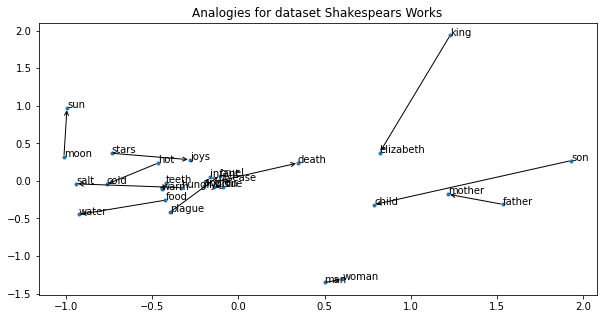

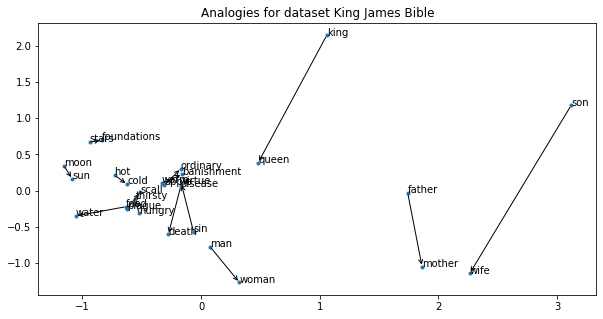

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_2 = PCA(n_components=2)

def make_analogy(model, this_1, is_to_that_1, this_2):
  is_to_that_2 = model.wv.most_similar(
    negative=[this_1],
    positive=[is_to_that_1, this_2]
  )
  return is_to_that_2[0][0]

def plot_data(model, from_labels, to_labels, name):
  labels = from_labels + to_labels
  data = pca_2.fit_transform([model.wv[w] for w in labels])
  plt.figure(figsize=(10, 5))
  plt.title(f"Analogies for dataset {name}")
  plt.plot(data[:,0], data[:,1], '.')
  for i in range(len(data)):
    plt.annotate(labels[i], xy = data[i])
  for i in range(len(data)//2):
    plt.annotate("",
      xy=data[i],
      xytext=data[i+len(data)//2],
      arrowprops=dict(arrowstyle="<-")
    )

def plot_analogies(model, analogies, name):
  from_labels = []
  to_labels = []
  for analogy in analogies:
    from_labels += analogy[:2]
    to_labels += analogy[2:] + [make_analogy(model, *analogy)]
  plot_data(model, from_labels, to_labels, name)

def print_analysis():
  models = [(model_1, "Shakespears Works"), (model_2, "King James Bible")]

  a1 = ["man", "king", "woman"]
  a2 = ["moon", "stars", "sun"]
  a3 = ["father", "son", "mother"]
  a4 = ["disease", "plague", "death"]
  a5 = ["hot", "warm", "cold"]
  a6 = ["sin", "apple", "virtue"]
  a7 = ["food", "hungry", "water"]
  analogies = [a1, a2, a3, a4, a5, a6, a7]

  for i, (model, name) in enumerate(models):
    print(f"Analogies for model {name}...")
    for i, (a, b, c) in enumerate(analogies):
      d = make_analogy(model, a, b, c)
      print(f"\tAnalogy {i}: `{a}' is to `{b}' as `{c}' is to `{d}'")
    plot_analogies(model, analogies, name)

print_analysis()


## Write down your analysis

Although the data we see above is a 2D representation of higher dimensional data, we are able to see some differences between the embeddings of the words between our models, as well as differences between the placement of different words relative to each other (as seen through the plotted analogies).
It is definitely important to note that although the two models are modeled off of corpora that are from around the same time frame, the contents and topics are very different, and the original Bible dates back over a thousand years.
First we'll take a look at the scatter plot of words.
While most of the words and their relations differ by a bit, such a mother and father, they seem to have around the same embedding, as evidenced by their somewhat similar placement between the two models.
Similarly, the words sun and moon also have similar placements.

Even though none of the analogies are the same between the two models, they are somewhat similar, and there are definitely some connections between the two.
For instance, for the analogy "father is to son as mother is to _____", we can see that the first model provides "child", while the second model provides "wife".
While "child" and "wife" are very different answers, they are both words that describe a family unit, and so we can see the connections between the two embeddings even if they differ.
Another really interesting analogy is the "man is to king as woman is to _____".
The model based off of Shakespeare's works gives the word "elizabeth".
Shakespeare spent the majority of his life under her rule, and to him, the word "queen" and "elizabeth" would have had very similar connotations.
In fact, her influence can be found in a number of his plays.
The model based off the Bible gives the expected word of "queen". 

Cite your sources:
-------------
- https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
- https://www.rct.uk/collection/themes/exhibitions/shakespeare-in-the-royal-library/windsor-castle/the-influence-of-elizabeth-i

Step 3: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [ ]:
import tensorflow

In [ ]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import SimpleRNN
# from keras.layers import Embedding

In [ ]:
# The size of the ngram language model you want to train
# change as needed for your experiments
NGRAM = 3 

# Not sure if this function should be adding all sent tokens to front and none to end or the way that it is now because of how step b is supposed to work

In [ ]:
def add_sentence_tokens(ngram, dataset):
    if ngram < 3:
        return dataset
    
    prepared_dataset = [[(ngram - 2) * START_TOKEN] + sentence + [(ngram - 2) * END_TOKEN] for sentence in dataset]
    return prepared_dataset

dataset_1_ngrams = add_sentence_tokens(NGRAM, dataset_1)
dataset_2_ngrams = add_sentence_tokens(NGRAM, dataset_2)

In [ ]:
def encode_text(data):
    # Initializing a Tokenizer
    # It is used to vectorize a text corpus. Here, it just creates a mapping from 
    # word to a unique index. (Note: Indexing starts from 0)
    # Example:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data)
    encoded = tokenizer.texts_to_sequences(data)
    return encoded

encoded_text_1 = encode_text(dataset_1_ngrams)
encoded_text_2 = encode_text(dataset_2_ngrams)

### b) Next, prepare your sequences from text

#### Fixed ngram based sequences 

In [ ]:
def generate_ngram_training_samples(encoded_data: list, ngram: int) -> list:
    '''
    Takes the encoded data (list of lists) and 
    generates the training samples out of it.
    Parameters:
    up to you, we've put in what we used
    but you can add/remove as needed
    return: 
    list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    training_samples = []
    
    for sentence in encoded_data:
        for i in range(len(sentence) - (ngram - 1)):
            training_samples.append(sentence[i:i+ngram])
    
    return training_samples
    
training_samples_1 = generate_ngram_training_samples(encoded_text_1, 3)
training_samples_2 = generate_ngram_training_samples(encoded_text_2, 3)

### c) Then, split the sequences into X and y and create a Data Generator

In [ ]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]

In [ ]:
import numpy as np

In [ ]:
def split_sequences(training_samples: list) -> list:
    X = np.array(training_samples)[:,:-1]
    y = np.array(training_samples)[:,-1]
    return X, y
    
X1, y1 = split_sequences(training_samples_1)
X2, y2 = split_sequences(training_samples_2)

In [ ]:
def read_embeddings():
    '''Loads and parses embeddings trained in earlier.
    Parameters and return values are up to you.
    '''
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':[0....], ...}
    # index to embedding : {1:[0....], ...} 
    # use your tokenizer's word_index to find the index of
    # a given word
    pass



In [ ]:
tokenizer.word_index

In [ ]:
def data_generator(X: list, y: list, num_sequences_per_batch: int) -> (list,list):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    '''
    pass



In [ ]:
# Examples
# initialize data_generator
# num_sequences_per_batch = 128 # this is the batch size
# steps_per_epoch = len(sequences)//num_sequences_per_batch  # Number of batches per epoch
# train_generator = data_generator(X, y, num_sequences_per_batch)

# sample=next(train_generator) # this is how you get data out of generators
# sample[0].shape # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
# sample[1].shape   # (batch_size, |V|) to_categorical

### d) Train your models

In [ ]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

# Define the model architecture using Keras Sequential API



In [ ]:
# Start training the model
model.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch,
          epochs=1)

### e) Generate Sentences

In [ ]:
# generate a sequence from the model
def generate_seq(model: Sequential, 
                 tokenizer: Tokenizer, 
                 seed: list, 
                 n_words: int):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    pass

### f) Compare your generated sentences

Sources Cited
----------------------------
